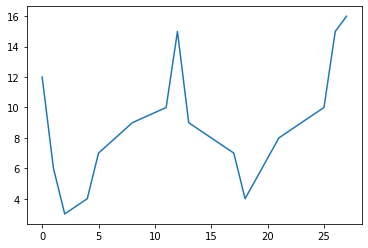

In [95]:
import numpy as np 
import matplotlib.pyplot as plt

# get data
raw_data = np.array([
    [0, 12],
    [1, 6],
    [2, 3],
    [4, 4],
    [5, 7],
    [8, 9],
    [11, 10],
    [12, 15],
    [13, 9],
    [17, 7],
    [18, 4],
    [21, 8],
    [25, 10],
    [26, 15],
    [27, 16],
])
plt.plot(raw_data[:, 0], raw_data[:, 1])
plt.show()

# Prepare train data

## Normalize data

In [96]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
train_data = normalizer.fit_transform(raw_data[:, 1:2])
# train_label = sc.transform(label)
train_data = train_data.reshape(-1)

In [97]:
data_len = 3
data_label_len = 1
window_size = 1

def split_raw(raw_data, data_len=3, data_label_len=2, window_size=1):
    value = []
    label = []
    index = 0
    while index + (data_len + data_label_len) < len(raw_data):
        value += [raw_data[index: index + data_len]]
        if window_size > 1:
            label += [raw_data[index + data_len: index + data_len + data_label_len]]
        else:
            label.append(raw_data[index + data_len])
        index += window_size
    value = np.array(value).reshape((-1, len(value[0]), 1))
    label = np.array(label)
    return value, label

value, label = split_raw(train_data, data_len=data_len, data_label_len=data_label_len, window_size=window_size)

In [98]:
label

array([0.07692308, 0.30769231, 0.46153846, 0.53846154, 0.92307692,
       0.46153846, 0.30769231, 0.07692308, 0.38461538, 0.53846154,
       0.92307692])

In [99]:
# import packages
# create a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Flatten
from tensorflow.keras.optimizers import SGD

def LSTM_model(X_train, y_train, normalizer):
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='relu'))
    my_LSTM_model.add(Flatten())
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    # my_LSTM_model.add(LSTM(units=5, activation='tanh'))
    my_LSTM_model.add(Dense(units=1))
    # Compile model
    my_LSTM_model.compile(optimizer="adam",loss="mean_squared_error")
    # Fit training set
    my_LSTM_model.fit(X_train, y_train, epochs=300, verbose=True)
    # predict train value to estimate train acc
    LSTM_prediction = my_LSTM_model.predict(X_train)
    # print(LSTM_prediction)
    LSTM_prediction = normalizer.inverse_transform(LSTM_prediction)
    return my_LSTM_model, LSTM_prediction
print("Tranining ...")
model, pred = LSTM_model(value, label, normalizer=normalizer)

Tranining ...
Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2778
Epoch 2/200
1/1 [==============================] - 0s 773us/step - loss: 0.2731
Epoch 3/200
1/1 [==============================] - 0s 955us/step - loss: 0.2684
Epoch 4/200
1/1 [==============================] - 0s 732us/step - loss: 0.2638
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2593
Epoch 6/200
1/1 [==============================] - 0s 875us/step - loss: 0.2549
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2506
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2463
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2421
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2380
Epoch 11/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2340
Epoch 12/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2300
Epoch 13/200
1/1 [=====================

In [100]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 3, 60)             14880     
_________________________________________________________________
flatten_9 (Flatten)          (None, 180)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 181       
Total params: 15,061
Trainable params: 15,061
Non-trainable params: 0
_________________________________________________________________


In [101]:
pred

array([[ 4.8435473],
       [ 8.9411955],
       [10.866681 ],
       [11.870507 ],
       [10.71254  ],
       [10.556002 ],
       [ 7.9115715],
       [ 3.7039387],
       [ 7.470453 ],
       [ 9.4050455],
       [12.307777 ]], dtype=float32)

[4, 5, 8, 11, 12, 13, 17, 18, 21, 25, 26] [array([4.8435473], dtype=float32), array([8.9411955], dtype=float32), array([10.866681], dtype=float32), array([11.870507], dtype=float32), array([10.71254], dtype=float32), array([10.556002], dtype=float32), array([7.9115715], dtype=float32), array([3.7039387], dtype=float32), array([7.470453], dtype=float32), array([9.4050455], dtype=float32), array([12.307777], dtype=float32)] 15


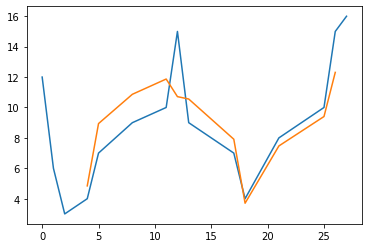

In [102]:
plt.plot(raw_data[:, 0], raw_data[:, 1])
x = []
y = []
index = 0
index_pred = 0
while index + data_len + data_label_len < len(raw_data):
    x.append(raw_data[index + data_len, 0])
    y.append(pred[index_pred])
    index += window_size
    index_pred += 1
plt.plot(x, y)
print(x, y, len(raw_data))